In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("datasetLaundry.csv")
pd.set_option('display.max_columns', None)
df.head(10)

,link,title,category,address,open_hours,popular_times,website,phone,plus_code,review_count,review_rating,reviews_per_rating,latitude,longitude,cid,status,descriptions,reviews_link,thumbnail,timezone,price_range,data_id,images,reservations,order_online,menu,owner,complete_address,about,user_reviews
0,https://www.google.com/maps/place/Fresh+Clean+...,Fresh Clean Laundry Bandung,Laundromat,"Jl. Cijawura Hilir No.14, Cijaura, Kec. Buahba...","{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...",{},http://freshcleanlaundrybandung.blogspot.com/,0896-5662-3999,"2MQ5+96 Cijaura, Bandung City, West Java",70,4.9,"{""1"":0,""2"":1,""3"":2,""4"":2,""5"":65}",-6.961585,107.658018,12648585617156400573,Closed ⋅ Opens 7 AM Tue,NaN,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipP-lL...,Asia/Jakarta,NaN,0x2e68e91e00a42199:0xaf88cd9a8db8e5bd,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""114276312698470590435"",""name"":""Fresh Cl...","{""borough"":""Cijaura, Buahbatu"",""street"":""Jl. C...",NaN,"[{""Name"":""Nabila Ardelia"",""ProfilePicture"":""ht..."
1,https://www.google.com/maps/place/Hade+Laundry...,Hade Laundry Simpang Dago,Laundry service,"Jl. Ir. H. Juanda No.170, Lebak Siliwangi, Ban...","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},https://linktr.ee/HADELAUNDRYINDONESIA,(022) 2532110,"4J77+RH Lebak Siliwangi, Bandung City, West Java",31,4.2,"{""1"":4,""2"":0,""3"":1,""4"":7,""5"":19}",-6.885456,107.613907,7932767787861932539,Closed ⋅ Opens 8 AM Tue,NaN,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipMKNv...,Asia/Jakarta,NaN,0x2e68e6f8952cacbf:0x6e16da46012bf9fb,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""112687205542120220201"",""name"":""Hade Lau...","{""borough"":""Lebak Siliwangi, Bandung"",""street""...",NaN,"[{""Name"":""Ji Hadi"",""ProfilePicture"":""https://l..."
2,https://www.google.com/maps/place/Laundry+Satu...,Laundry Satuan-Laundry Kiloan-Laundry Express-...,Laundry service,"Jl. Pendawa No.25a, RW.68, Arjuna, Cicendo, Ba...","{""Friday"":[""8 AM–6 PM""],""Monday"":[""8 AM–6 PM""]...",{},NaN,0812-2383-6690,"3HQV+XV Arjuna, Bandung City, West Java",94,4.3,"{""1"":7,""2"":2,""3"":10,""4"":13,""5"":62}",-6.910042,107.594640,3261173327998017622,Closed ⋅ Opens 8 AM Tue,NaN,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipMSmc...,Asia/Jakarta,NaN,0x2e68e614c3fa0569:0x2d4203dd064ce056,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,"[{""link"":""https://gg-laundry.com/"",""source"":""g...","{""link"":"""",""source"":""""}","{""id"":""113011615826845129050"",""name"":""Laundry ...","{""borough"":""Arjuna, Cicendo"",""street"":""Jl. Pen...","[{""id"":""from_the_business"",""name"":""From the bu...","[{""Name"":""Rs G"",""ProfilePicture"":""https://lh3...."
3,https://www.google.com/maps/place/Amala+Expres...,Amala Express Laundry & Wet Cleaning,Laundromat,"Jl. Merdeka No.25 - 27, Babakanciamis, Sumurba...","{""Friday"":[""8 AM–7 PM""],""Monday"":[""8 AM–7 PM""]...","{""Friday"":{""10"":15,""11"":15,""12"":36,""13"":47,""14...",NaN,0819-0819-6626,"3JR5+8X Babakanciamis, Bandung City, West Java",72,4.9,"{""1"":1,""2"":0,""3"":1,""4"":3,""5"":67}",-6.909175,107.609894,9780147723943696905,Closed ⋅ Opens 8 AM Tue,NaN,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipNNbu...,Asia/Jakarta,NaN,0x2e68e7911c348645:0x87ba108998825a09,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""117173439747630094655"",""name"":""Amala Ex...","{""borough"":""Babakanciamis, Sumurbandung"",""stre...",NaN,"[{""Name"":""Didda Novandia Supriadi"",""ProfilePic..."
4,https://www.google.com/maps/place/Sorcha+Laund...,Sorcha Laundry Pajajaran (Laundry Antar Jemput...

In [5]:
# hapus kolom yang tidak sesuai dengan kriteria
kolom_tidak_diperlukan = [
    'link',       # Kolom yang tidak diperlukan
    'status',     # Status operasional
    'descriptions',
    'thumbnail',  # Gambar thumbnail
    'timezone',   # Zona waktu
    'price_range',
    'data_id',    # ID unik
    'images',     # Informasi visual
    'reservations',  # Data reservasi
    'order_online',   # Data pemesanan online
    'menu',
    'about',
    'category',
    'address',
    'user_reviews',
    'complete_address',
    'reviews_link',
    'owner',
    'cid'
]
df_cleaned = df.drop(columns=kolom_tidak_diperlukan)
df_cleaned.head(10)

,title,open_hours,popular_times,website,phone,plus_code,review_count,review_rating,reviews_per_rating,latitude,longitude
0,Fresh Clean Laundry Bandung,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...",{},http://freshcleanlaundrybandung.blogspot.com/,0896-5662-3999,"2MQ5+96 Cijaura, Bandung City, West Java",70,4.9,"{""1"":0,""2"":1,""3"":2,""4"":2,""5"":65}",-6.961585,107.658018
1,Hade Laundry Simpang Dago,"{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},https://linktr.ee/HADELAUNDRYINDONESIA,(022) 2532110,"4J77+RH Lebak Siliwangi, Bandung City, West Java",31,4.2,"{""1"":4,""2"":0,""3"":1,""4"":7,""5"":19}",-6.885456,107.613907
2,Laundry Satuan-Laundry Kiloan-Laundry Express-...,"{""Friday"":[""8 AM–6 PM""],""Monday"":[""8 AM–6 PM""]...",{},NaN,0812-2383-6690,"3HQV+XV Arjuna, Bandung City, West Java",94,4.3,"{""1"":7,""2"":2,""3"":10,""4"":13,""5"":62}",-6.910042,107.594640
3,Amala Express Laundry & Wet Cleaning,"{""Friday"":[""8 AM–7 PM""],""Monday"":[""8 AM–7 PM""]...","{""Friday"":{""10"":15,""11"":15,""12"":36,""13"":47,""14...",NaN,0819-0819-6626,"3JR5+8X Babakanciamis, Bandung City, West Java",72,4.9,"{""1"":1,""2"":0,""3"":1,""4"":3,""5"":67}",-6.909175,107.609894
4,Sorcha Laundry Pajajaran (Laundry Antar Jemput...,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":58,""11"":63,""12"":71,""13"":68,""14...",http://sorchalaundry.com/,0811-1111-2731,"3HRR+P6 Arjuna, Bandung City, West Java",462,4.9,"{""1"":10,""2"":1,""3"":1,""4"":1,""5"":449}",-6.908127,107.590543
5,Laundry Express Bandung,"{""Friday"":[""8 AM–8 PM""],""Monday"":[""8 AM–8 PM""]...","{""Friday"":{""10"":55,""11"":53,""12"":67,""13"":69,""14...",http://laundryexpressbandung.com/,0851-7248-8338,"3JF5+RF Balonggede, Bandung City, West Java",401,4.9,"{""1"":5,""2"":2,""3"":0,""4"":4,""5"":390}",-6.925439,107.608687
6,First Clean Laundry for Hotel,"{""Friday"":[""5.00 am–10.00 pm""],""Monday"":[""5.00...","{""Friday"":{""10"":16,""11"":33,""12"":27,""13"":55,""14...",NaN,0857-9797-8343,"4JCF+CF Cigadung, Bandung City, West Java",33,5.0,"{""1"":0,""2"":0,""3"":0,""4"":0,""5"":33}",-6.878945,107.623651
7,Urban Laundry & Dry Cleaning,"{""Friday"":[""7 AM–5 PM""],""Monday"":[""7 AM–5 PM""]...",{},NaN,0898-4108-777,"4J87+67 Dago, Bandung City, West Java",74,4.7,"{""1"":5,""2"":0,""3"":0,""4"":4,""5"":65}",-6.884412,107.613165
8,Hade Laundry,"{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...","{""Friday"":{""10"":77,""11"":95,""12"":85,""13"":90,""14...",https://linktr.ee/HADELAUNDRYINDONESIA,(022) 7322334,"3J8G+8Q Turangga, Bandung City, West Java",20,4.3,"{""1"":3,""2"":0,""3"":0,""4"":2,""5"":15}",-6.934192,107.626997
9,Chingu Laundry Express,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":64,""11"":58,""12"":76,""13"":88,""14...",http://chingu-laundry.com/,0851-7445-0012,"4J62+8G Pasteur, Bandung City, West Java",253,4.9,"{""1"":4,""2"":0,""3"":0,""4"":2,""5"":247}",-6.889136,107.601356


In [6]:
df_cleaned.dtypes

title                  object
open_hours             object
popular_times          object
website                object
phone                  object
plus_code              object
review_count            int64
review_rating         float64
reviews_per_rating     object
latitude              float64
longitude             float64
dtype: object

In [7]:
df_cleaned.fillna({        # Mengisi NaN pada kolom 'phone' dengan 'Tidak Ada'
    'website': 'Tidak Ada',       # Mengisi NaN pada kolom 'website' dengan 'Tidak Ada'
}, inplace=True)

df_cleaned.fillna(0, inplace=True)
df_cleaned.head(10)

,title,open_hours,popular_times,website,phone,plus_code,review_count,review_rating,reviews_per_rating,latitude,longitude
0,Fresh Clean Laundry Bandung,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...",{},http://freshcleanlaundrybandung.blogspot.com/,0896-5662-3999,"2MQ5+96 Cijaura, Bandung City, West Java",70,4.9,"{""1"":0,""2"":1,""3"":2,""4"":2,""5"":65}",-6.961585,107.658018
1,Hade Laundry Simpang Dago,"{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},https://linktr.ee/HADELAUNDRYINDONESIA,(022) 2532110,"4J77+RH Lebak Siliwangi, Bandung City, West Java",31,4.2,"{""1"":4,""2"":0,""3"":1,""4"":7,""5"":19}",-6.885456,107.613907
2,Laundry Satuan-Laundry Kiloan-Laundry Express-...,"{""Friday"":[""8 AM–6 PM""],""Monday"":[""8 AM–6 PM""]...",{},Tidak Ada,0812-2383-6690,"3HQV+XV Arjuna, Bandung City, West Java",94,4.3,"{""1"":7,""2"":2,""3"":10,""4"":13,""5"":62}",-6.910042,107.594640
3,Amala Express Laundry & Wet Cleaning,"{""Friday"":[""8 AM–7 PM""],""Monday"":[""8 AM–7 PM""]...","{""Friday"":{""10"":15,""11"":15,""12"":36,""13"":47,""14...",Tidak Ada,0819-0819-6626,"3JR5+8X Babakanciamis, Bandung City, West Java",72,4.9,"{""1"":1,""2"":0,""3"":1,""4"":3,""5"":67}",-6.909175,107.609894
4,Sorcha Laundry Pajajaran (Laundry Antar Jemput...,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":58,""11"":63,""12"":71,""13"":68,""14...",http://sorchalaundry.com/,0811-1111-2731,"3HRR+P6 Arjuna, Bandung City, West Java",462,4.9,"{""1"":10,""2"":1,""3"":1,""4"":1,""5"":449}",-6.908127,107.590543
5,Laundry Express Bandung,"{""Friday"":[""8 AM–8 PM""],""Monday"":[""8 AM–8 PM""]...","{""Friday"":{""10"":55,""11"":53,""12"":67,""13"":69,""14...",http://laundryexpressbandung.com/,0851-7248-8338,"3JF5+RF Balonggede, Bandung City, West Java",401,4.9,"{""1"":5,""2"":2,""3"":0,""4"":4,""5"":390}",-6.925439,107.608687
6,First Clean Laundry for Hotel,"{""Friday"":[""5.00 am–10.00 pm""],""Monday"":[""5.00...","{""Friday"":{""10"":16,""11"":33,""12"":27,""13"":55,""14...",Tidak Ada,0857-9797-8343,"4JCF+CF Cigadung, Bandung City, West Java",33,5.0,"{""1"":0,""2"":0,""3"":0,""4"":0,""5"":33}",-6.878945,107.623651
7,Urban Laundry & Dry Cleaning,"{""Friday"":[""7 AM–5 PM""],""Monday"":[""7 AM–5 PM""]...",{},Tidak Ada,0898-4108-777,"4J87+67 Dago, Bandung City, West Java",74,4.7,"{""1"":5,""2"":0,""3"":0,""4"":4,""5"":65}",-6.884412,107.613165
8,Hade Laundry,"{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...","{""Friday"":{""10"":77,""11"":95,""12"":85,""13"":90,""14...",https://linktr.ee/HADELAUNDRYINDONESIA,(022) 7322334,"3J8G+8Q Turangga, Bandung City, West Java",20,4.3,"{""1"":3,""2"":0,""3"":0,""4"":2,""5"":15}",-6.934192,107.626997
9,Chingu Laundry Express,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":64,""11"":58,""12"":76,""13"":88,""14...",http://chingu-laundry.com/,0851-7445-0012,"4J62+8G Pasteur, Bandung City, West Java",253,4.9,"{""1"":4,""2"":0,""3"":0,""4"":2,""5"":247}",-6.889136,107.601356


In [8]:
df_cleaned.isna().sum()

title                 0
open_hours            0
popular_times         0
website               0
phone                 0
plus_code             0
review_count          0
review_rating         0
reviews_per_rating    0
latitude              0
longitude             0
dtype: int64

In [9]:
# Memeriksa tipe data setiap kolom
df_cleaned.dtypes

title                  object
open_hours             object
popular_times          object
website                object
phone                  object
plus_code              object
review_count            int64
review_rating         float64
reviews_per_rating     object
latitude              float64
longitude             float64
dtype: object

In [10]:
df_cleaned.describe()

,review_count,review_rating,latitude,longitude
count,82.000000,82.000000,82.000000,82.000000
mean,55.804878,4.454878,-6.909104,107.621038
std,146.046622,0.886824,0.030199,0.030258
min,0.000000,0.000000,-6.974752,107.558218
25%,5.250000,4.300000,-6.929254,107.602579
50%,18.000000,4.800000,-6.909609,107.617332
75%,37.000000,4.975000,-6.887847,107.634331
max,1109.000000,5.000000,-6.844991,107.739824


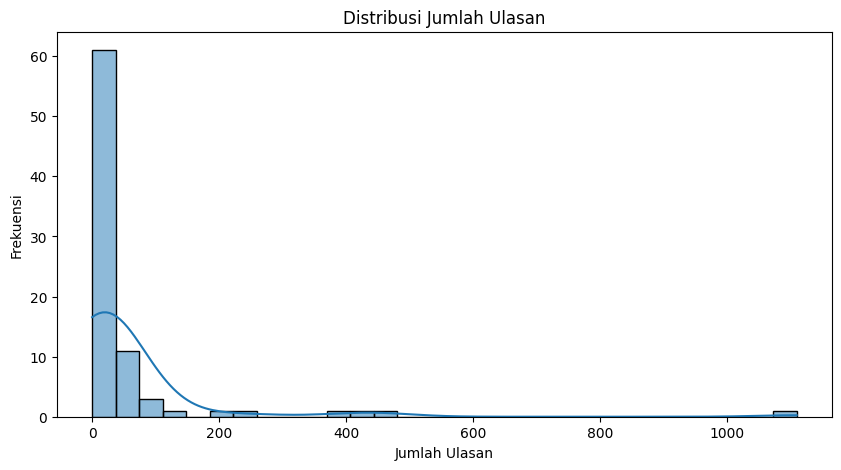

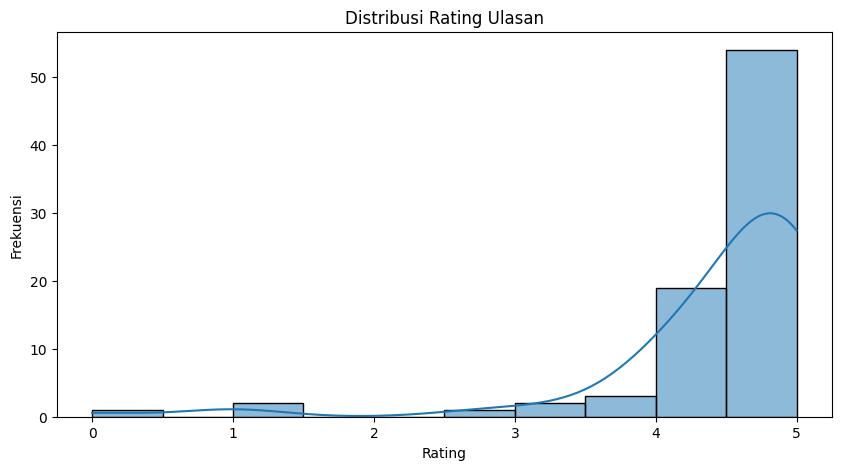

In [11]:
# Histogram review_count
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['review_count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Frekuensi')
plt.show()

# Histogram review_rating
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['review_rating'], bins=10, kde=True)
plt.title('Distribusi Rating Ulasan')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
# Bobot kriteria 
weights = {
    'review_count': 0.3,
    'review_rating': 0.3,
    'longitude': 0.2,
    'latitude': 0.2
}

In [13]:
# Normalisasi kriteria manfaat (review_count, review_rating)
df_cleaned['norm_review_count'] = df_cleaned['review_count'] / df_cleaned['review_count'].max()
df_cleaned['norm_review_rating'] = df_cleaned['review_rating'] / df_cleaned['review_rating'].max()

# Normalisasi kriteria biaya (longitude, latitude)
df_cleaned['norm_longitude'] = df_cleaned['longitude'].min() / df_cleaned['longitude']
df_cleaned['norm_latitude'] = df_cleaned['latitude'].min() / df_cleaned['latitude']


In [14]:
df_cleaned['score'] = (
    df_cleaned['norm_review_count'] * weights['review_count'] +
    df_cleaned['norm_review_rating'] * weights['review_rating'] +
    df_cleaned['norm_longitude'] * weights['longitude'] +
    df_cleaned['norm_latitude'] * weights['latitude']
)


In [15]:
# Mengurutkan berdasarkan skor
df_sorted = df_cleaned.sort_values(by='score', ascending=False)

# Menampilkan hasil
# df_sorted[['title', 'score']]

# Memilih 10 tempat laundry teratas
top_10_laundry = df_sorted.head(10)

# Menampilkan hasil normalisasi untuk 10 tempat laundry teratas
top_10_laundry[['title', 'norm_review_count', 'norm_review_rating', 'norm_longitude', 'norm_latitude', 'score']]


,title,norm_review_count,norm_review_rating,norm_longitude,norm_latitude,score
12,LaundryKlin Cihampelas (Laundry Antar Jemput B...,1.000000,0.98,0.999576,1.012597,0.996435
4,Sorcha Laundry Pajajaran (Laundry Antar Jemput...,0.416592,0.98,0.999700,1.009644,0.820846
34,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.394950,1.00,0.999364,1.007677,0.819893
5,Laundry Express Bandung,0.361587,0.98,0.999531,1.007121,0.803806
9,Chingu Laundry Express,0.228133,0.98,0.999599,1.012428,0.764845
27,Laundry Club Gegerkalong (Laundry Antar Jemput),0.183048,0.98,0.999755,1.015480,0.751961
11,Kingwash Laundry,0.078449,1.00,0.999170,1.010626,0.725494
3,Amala Express Laundry & Wet Cleaning,0.064923,0.98,0.999520,1.009491,0.715279
14,BJ Laundry,0.045086,1.00,0.999293,1.000000,0.713384
40,BJ Laundry,0.045086,1.00,0.999293,1.000000,0.713384


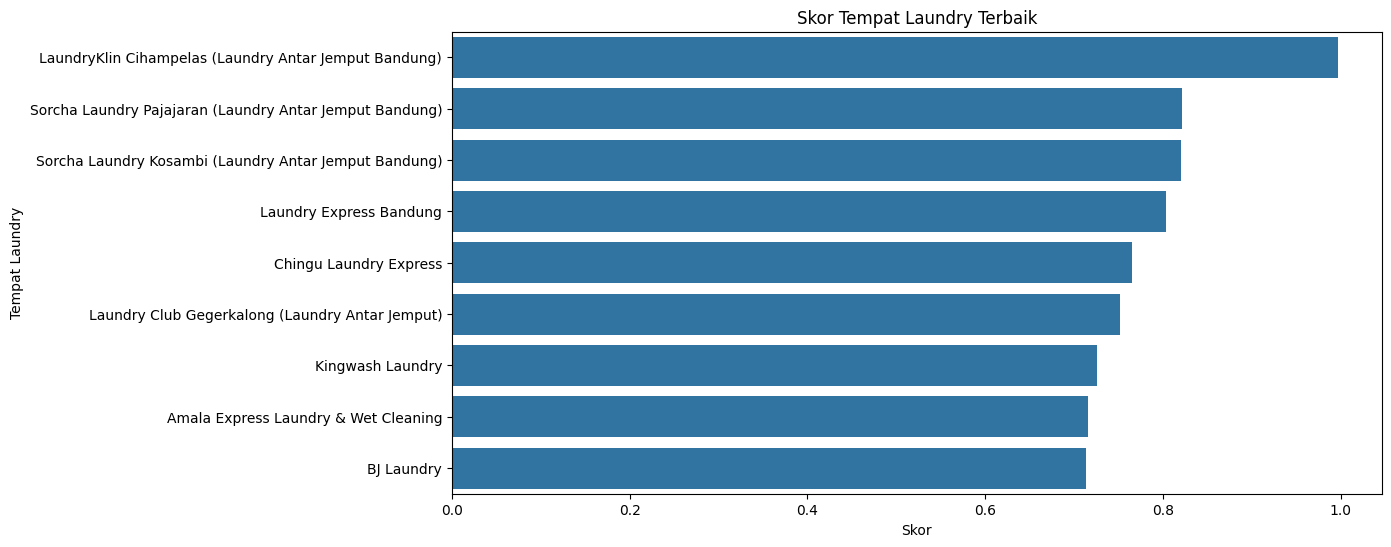

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='title', data=top_10_laundry)
plt.title('Skor Tempat Laundry Terbaik')
plt.xlabel('Skor')
plt.ylabel('Tempat Laundry')
plt.show()


In [17]:
# Bobot kriteria
weights = {
    'review_count': 0.3,
    'review_rating': 0.3,
    'longitude': 0.2,
    'latitude': 0.2
}

In [18]:
# Normalisasi kriteria
# Kriteria manfaat (review_count, review_rating) - menggunakan metode WMP
df_cleaned['norm_review_count'] = df_cleaned['review_count'] / df_cleaned['review_count'].max()
df_cleaned['norm_review_rating'] = df_cleaned['review_rating'] / df_cleaned['review_rating'].max()

# Kriteria biaya (longitude, latitude) - normalisasi menggunakan nilai minimum
df_cleaned['norm_longitude'] = df_cleaned['longitude'].min() / df_cleaned['longitude']
df_cleaned['norm_latitude'] = df_cleaned['latitude'].min() / df_cleaned['latitude']


In [19]:
# Menghitung skor WMP
# Menggunakan produk tertimbang
df_cleaned['score'] = (
    (df_cleaned['norm_review_count'] ** weights['review_count']) *
    (df_cleaned['norm_review_rating'] ** weights['review_rating']) *
    (df_cleaned['norm_longitude'] ** weights['longitude']) *
    (df_cleaned['norm_latitude'] ** weights['latitude'])
)

In [20]:
# Mengurutkan berdasarkan skor
df_sorted = df_cleaned.sort_values(by='score', ascending=False)

In [21]:
# Memilih 10 tempat laundry teratas
top_10_laundry = df_sorted.head(10)

In [22]:
# Menampilkan hasil WMP untuk 10 tempat laundry teratas
top_10_laundry[['title', 'norm_review_count', 'norm_review_rating', 'norm_longitude', 'norm_latitude', 'score']]

,title,norm_review_count,norm_review_rating,norm_longitude,norm_latitude,score
12,LaundryKlin Cihampelas (Laundry Antar Jemput B...,1.000000,0.98,0.999576,1.012597,0.996365
4,Sorcha Laundry Pajajaran (Laundry Antar Jemput...,0.416592,0.98,0.999700,1.009644,0.765753
34,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.394950,1.00,0.999364,1.007677,0.757830
5,Laundry Express Bandung,0.361587,0.98,0.999531,1.007121,0.733512
9,Chingu Laundry Express,0.228133,0.98,0.999599,1.012428,0.639532
27,Laundry Club Gegerkalong (Laundry Antar Jemput),0.183048,0.98,0.999755,1.015480,0.599032
10,AERO CLEAN LAUNDRY BANDUNG,0.109107,0.90,0.999319,1.005285,0.498916
11,Kingwash Laundry,0.078449,1.00,0.999170,1.010626,0.466898
2,Laundry Satuan-Laundry Kiloan-Laundry Express-...,0.084761,0.86,0.999661,1.009365,0.456655
3,Amala Express Laundry & Wet Cleaning,0.064923,0.98,0.999520,1.009491,0.438396


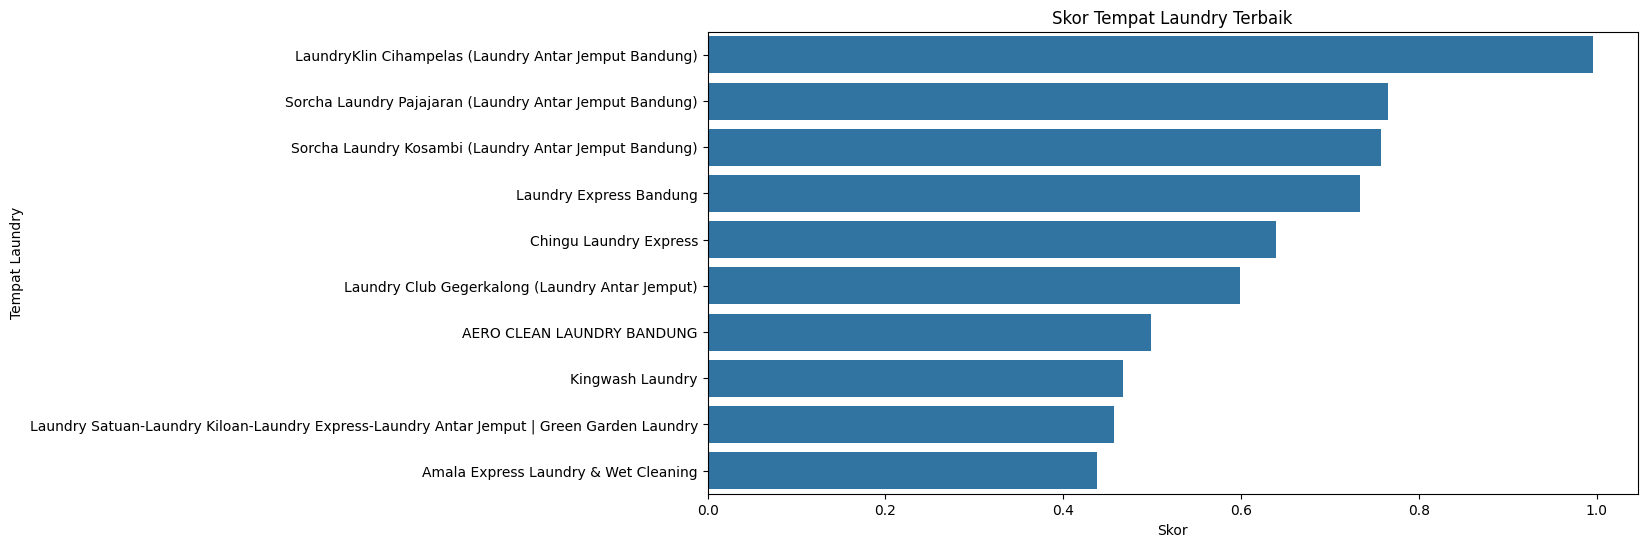

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='title', data=top_10_laundry)
plt.title('Skor Tempat Laundry Terbaik')
plt.xlabel('Skor')
plt.ylabel('Tempat Laundry')
plt.show()


In [24]:
# Bobot kriteria 
weights = {
    'review_count': 0.3,
    'review_rating': 0.3,
    'longitude': 0.2,
    'latitude': 0.2
}

In [25]:
# Normalisasi menggunakan metode MOORA
df_cleaned['norm_review_count'] = df_cleaned['review_count'] / np.sqrt((df_cleaned['review_count'] ** 2).sum())
df_cleaned['norm_review_rating'] = df_cleaned['review_rating'] / np.sqrt((df_cleaned['review_rating'] ** 2).sum())
df_cleaned['norm_longitude'] = df_cleaned['longitude'].min() / np.sqrt((df_cleaned['longitude'] ** 2).sum())
df_cleaned['norm_latitude'] = df_cleaned['latitude'].min() / np.sqrt((df_cleaned['latitude'] ** 2).sum())

In [26]:
# Menghitung skor MOORA
df_cleaned['score'] = ( 
    df_cleaned['norm_review_count'] * weights['review_count'] +
    df_cleaned['norm_review_rating'] * weights['review_rating'] +
    df_cleaned['norm_longitude'] * weights['longitude'] +
    df_cleaned['norm_latitude'] * weights['latitude']
)

In [27]:
# Mengurutkan berdasarkan skor
df_sorted = df_cleaned.sort_values(by='score', ascending=False)


In [28]:
# Memilih 10 tempat laundry teratas
top_10_laundry = df_sorted.head(10)

In [29]:
# Menampilkan hasil MOORA untuk 10 tempat laundry teratas
top_10_laundry[['title', 'norm_review_count', 'norm_review_rating', 'norm_longitude', 'norm_latitude', 'score']]

,title,norm_review_count,norm_review_rating,norm_longitude,norm_latitude,score
12,LaundryKlin Cihampelas (Laundry Antar Jemput B...,0.787523,0.119156,0.110367,-0.11148,0.271781
4,Sorcha Laundry Pajajaran (Laundry Antar Jemput...,0.328076,0.119156,0.110367,-0.11148,0.133947
34,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.311033,0.121588,0.110367,-0.11148,0.129564
5,Laundry Express Bandung,0.284758,0.119156,0.110367,-0.11148,0.120952
9,Chingu Laundry Express,0.179660,0.119156,0.110367,-0.11148,0.089422
27,Laundry Club Gegerkalong (Laundry Antar Jemput),0.144154,0.119156,0.110367,-0.11148,0.078771
10,AERO CLEAN LAUNDRY BANDUNG,0.085925,0.109429,0.110367,-0.11148,0.058383
11,Kingwash Laundry,0.061780,0.121588,0.110367,-0.11148,0.054788
2,Laundry Satuan-Laundry Kiloan-Laundry Express-...,0.066751,0.104565,0.110367,-0.11148,0.051172
3,Amala Express Laundry & Wet Cleaning,0.051129,0.119156,0.110367,-0.11148,0.050863


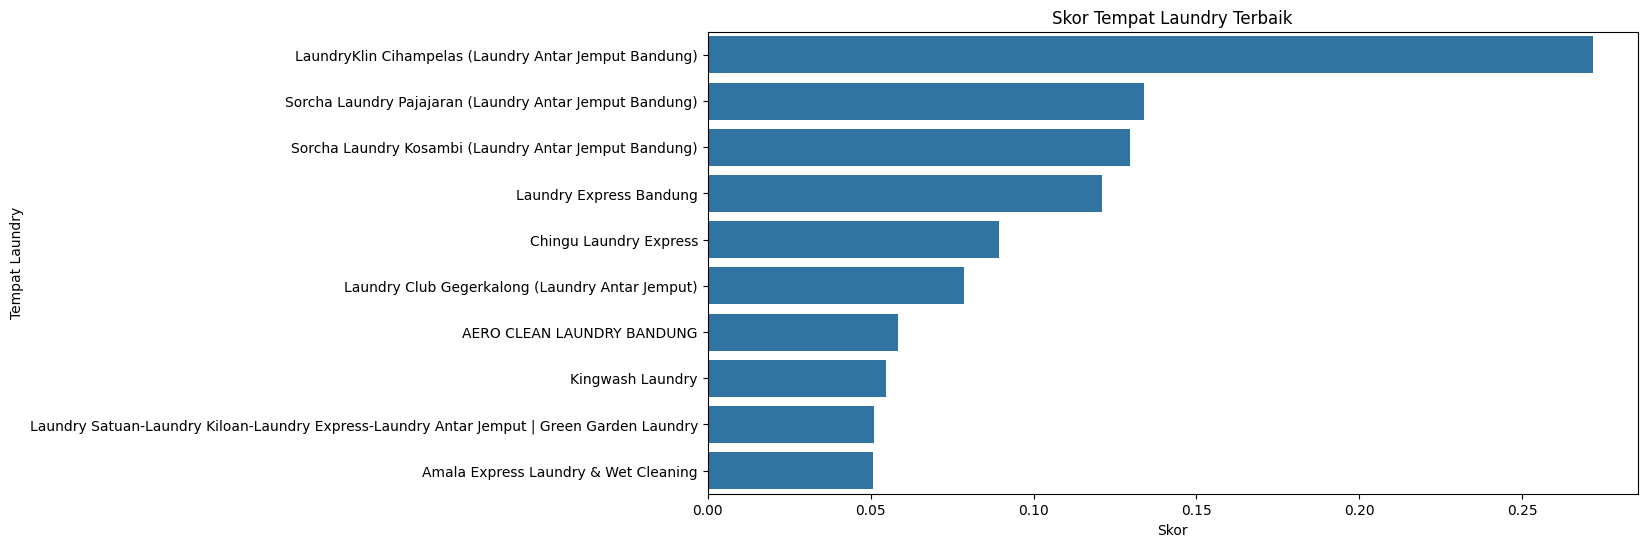

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='title', data=top_10_laundry)
plt.title('Skor Tempat Laundry Terbaik')
plt.xlabel('Skor')
plt.ylabel('Tempat Laundry')
plt.show()


In [31]:
# Bobot kriteria
weights = {
    'review_count': 0.3,
    'review_rating': 0.3,
    'longitude': 0.2,
    'latitude': 0.2
}

In [32]:
# Normalisasi kriteria
# Kriteria manfaat (review_count, review_rating)
df_cleaned['norm_review_count'] = df_cleaned['review_count'] / np.sqrt((df_cleaned['review_count'] ** 2).sum())
df_cleaned['norm_review_rating'] = df_cleaned['review_rating'] / np.sqrt((df_cleaned['review_rating'] ** 2).sum())

# Kriteria biaya (longitude, latitude)
df_cleaned['norm_longitude'] = df_cleaned['longitude'].min() / np.sqrt((df_cleaned['longitude'] ** 2).sum())
df_cleaned['norm_latitude'] = df_cleaned['latitude'].min() / np.sqrt((df_cleaned['latitude'] ** 2).sum())


In [33]:
# Menghitung matriks terbobot
df_cleaned['weighted_review_count'] = df_cleaned['norm_review_count'] * weights['review_count']
df_cleaned['weighted_review_rating'] = df_cleaned['norm_review_rating'] * weights['review_rating']
df_cleaned['weighted_longitude'] = df_cleaned['norm_longitude'] * weights['longitude']
df_cleaned['weighted_latitude'] = df_cleaned['norm_latitude'] * weights['latitude']


In [34]:
# Menghitung solusi ideal dan anti-ideal
ideal_solution = df_cleaned[['weighted_review_count', 'weighted_review_rating', 'weighted_longitude', 'weighted_latitude']].max()
anti_ideal_solution = df_cleaned[['weighted_review_count', 'weighted_review_rating', 'weighted_longitude', 'weighted_latitude']].min()


In [35]:
# Menghitung jarak ke solusi ideal dan anti-ideal
df_cleaned['distance_to_ideal'] = np.sqrt(
    (df_cleaned['weighted_review_count'] - ideal_solution['weighted_review_count']) ** 2 +
    (df_cleaned['weighted_review_rating'] - ideal_solution['weighted_review_rating']) ** 2 +
    (df_cleaned['weighted_longitude'] - ideal_solution['weighted_longitude']) ** 2 +
    (df_cleaned['weighted_latitude'] - ideal_solution['weighted_latitude']) ** 2
)

df_cleaned['distance_to_anti_ideal'] = np.sqrt(
    (df_cleaned['weighted_review_count'] - anti_ideal_solution['weighted_review_count']) ** 2 +
    (df_cleaned['weighted_review_rating'] - anti_ideal_solution['weighted_review_rating']) ** 2 +
    (df_cleaned['weighted_longitude'] - anti_ideal_solution['weighted_longitude']) ** 2 +
    (df_cleaned['weighted_latitude'] - anti_ideal_solution['weighted_latitude']) ** 2
)

In [44]:
# Menghitung skor TOPSIS
df_cleaned['topsis_score'] = df_cleaned['distance_to_anti_ideal'] / (df_cleaned['distance_to_ideal'] + df_cleaned['distance_to_anti_ideal'])

0     0.148927
1     0.120058
2     0.146806
3     0.149715
4     0.431719
        ...   
77    0.134194
78    0.134194
79    0.133850
80    0.133850
81    0.131056
Name: topsis_score, Length: 82, dtype: float64

In [37]:
# Mengurutkan berdasarkan skor
df_sorted = df_cleaned.sort_values(by='topsis_score', ascending=False)


In [38]:
# Memilih 10 tempat laundry teratas
top_10_laundry = df_sorted.head(10)

In [39]:
# Menampilkan hasil TOPSIS untuk 10 tempat laundry teratas
top_10_laundry[['title', 'norm_review_count', 'norm_review_rating', 'norm_longitude', 'norm_latitude', 'topsis_score']]

,title,norm_review_count,norm_review_rating,norm_longitude,norm_latitude,topsis_score
12,LaundryKlin Cihampelas (Laundry Antar Jemput B...,0.787523,0.119156,0.110367,-0.11148,0.996956
4,Sorcha Laundry Pajajaran (Laundry Antar Jemput...,0.328076,0.119156,0.110367,-0.11148,0.431719
34,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.311033,0.121588,0.110367,-0.11148,0.412062
5,Laundry Express Bandung,0.284758,0.119156,0.110367,-0.11148,0.380407
9,Chingu Laundry Express,0.179660,0.119156,0.110367,-0.11148,0.261804
27,Laundry Club Gegerkalong (Laundry Antar Jemput),0.144154,0.119156,0.110367,-0.11148,0.225224
10,AERO CLEAN LAUNDRY BANDUNG,0.085925,0.109429,0.110367,-0.11148,0.165469
11,Kingwash Laundry,0.061780,0.121588,0.110367,-0.11148,0.158194
3,Amala Express Laundry & Wet Cleaning,0.051129,0.119156,0.110367,-0.11148,0.149715
0,Fresh Clean Laundry Bandung,0.049708,0.119156,0.110367,-0.11148,0.148927


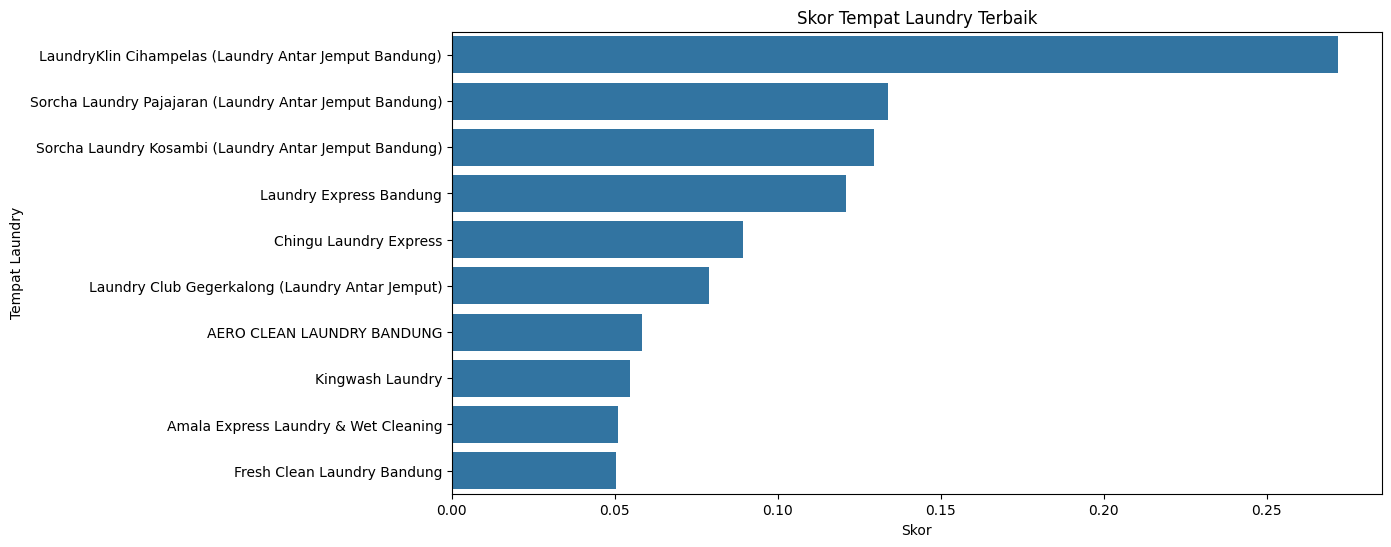

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='title', data=top_10_laundry)
plt.title('Skor Tempat Laundry Terbaik')
plt.xlabel('Skor')
plt.ylabel('Tempat Laundry')
plt.show()
